# Ejercitación espacios de color

Segmentación por color

In [1]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt


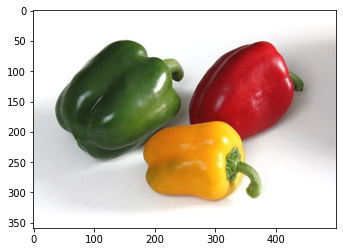

In [2]:
# Cargar la imagen color
#-----------------------
img_color = cv.imread('pimiento_morron.jpg')
imgRGB = cv.cvtColor(img_color, cv.COLOR_BGR2RGB)

plt.figure(1)
plt.imshow(imgRGB)
plt.show()

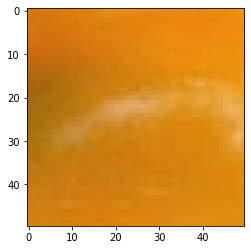

In [3]:
# Tomamos una muestra del morron amarillo
#----------------------------------------
#img_muestra = imgRGB[100:150,325:375,:]
img_muestra = imgRGB[230:280,230:280,:]
plt.figure(2)
plt.imshow(img_muestra)
plt.show()

In [4]:
# Calculamos un modelo estadístico sencillo para caracterizar el color del morrón rojo en el espacio RGB
#-----------------------------------------------------------------------------------------------------
color_mean, color_std = cv.meanStdDev(img_muestra)

print(color_mean.flatten().tolist())
print(color_std.flatten().tolist())


[213.66680000000002, 132.0984, 21.5452]
[16.6917398062632, 12.948695588359449, 15.321121269672139]


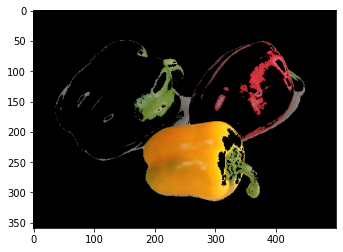

<function matplotlib.pyplot.show(close=None, block=None)>

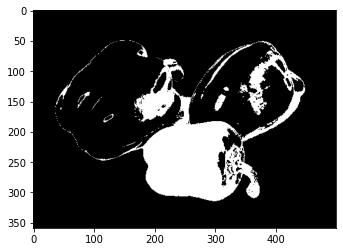

In [5]:
# Pintemos de blanco los puntos que estén cerca de color_mean en un radio menor que 3 sigmas
#-----------------------------------------------------------------------------------------
mask = cv.inRange(imgRGB, color_mean-color_std*7,  color_mean+color_std*7)
img_segmentada = cv.bitwise_and(imgRGB, imgRGB, mask=mask)

plt.figure(3)
plt.imshow(img_segmentada)
plt.show()

plt.figure(4)
plt.imshow(mask,cmap='gray')
plt.show

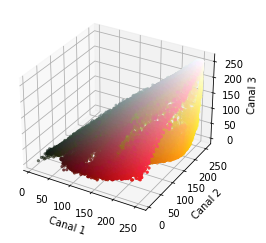

In [6]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

c1, c2, c3 = cv.split(imgRGB)
#c1, c2, c3 = cv.split(img_HSV)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = imgRGB.reshape((np.shape(imgRGB)[0]*np.shape(imgRGB)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(c1.flatten(), c2.flatten(), c3.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Canal 1")
axis.set_ylabel("Canal 2")
axis.set_zlabel("Canal 3")
plt.show()

In [7]:
# Trabajemos en HSV
#------------------
# Cuáles eran los flags para pasar a hsv ???
flags = [i for i in dir(cv) if ( i.find('HSV')>0) ]
print(flags)

['COLORMAP_HSV', 'COLOR_BGR2HSV', 'COLOR_BGR2HSV_FULL', 'COLOR_HSV2BGR', 'COLOR_HSV2BGR_FULL', 'COLOR_HSV2RGB', 'COLOR_HSV2RGB_FULL', 'COLOR_RGB2HSV', 'COLOR_RGB2HSV_FULL']


(17.2744, 229.38400000000001, 213.66680000000002, 0.0)


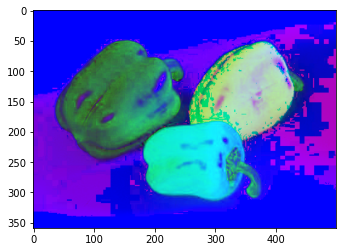

In [8]:
# Pasamos la imagen a HSV y calculo el color de muestra
#------------------------------------------------------
img_HSV = cv.cvtColor(img_color, cv.COLOR_BGR2HSV)
plt.figure(5)
plt.imshow(img_HSV)


#img_muestra = img_HSV[100:150,325:375,:]
img_muestra_hsv = img_HSV[230:280,230:280,:]

# Calculamos un modelo estadístico sencillo para caracterizar el color del morrón rojo en el espacio RGB
color_mean = cv.mean(img_muestra_hsv)
    
print(color_mean)

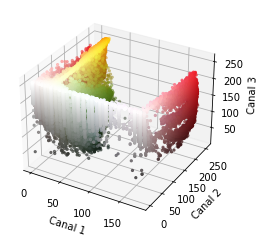

In [11]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

# c1, c2, c3 = cv.split(imgRGB)
c1, c2, c3 = cv.split(img_HSV)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = imgRGB.reshape((np.shape(imgRGB)[0]*np.shape(imgRGB)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(c1.flatten(), c2.flatten(), c3.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Canal 1")
axis.set_ylabel("Canal 2")
axis.set_zlabel("Canal 3")
plt.show()
## si lo vemos de arriba, el HSV SI es una gaussiana

In [9]:
# Cómo puedo segmentar el amarillo ?
print(img_HSV[256,240,:])

[ 17 190 193]


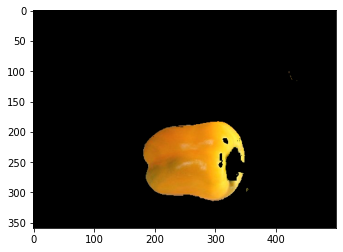

In [10]:
color_l = (14,100,100)
color_u = (28,255,255)

mask = cv.inRange(img_HSV, color_l,  color_u)
img_segmentada = cv.bitwise_and(imgRGB, imgRGB, mask=mask)

plt.figure(6)
plt.imshow(img_segmentada)
plt.show()